# Predicting Customer Default with Machine Learning

In [2]:
# Python Language Version
from platform import python_version
print('Python Language Version Used In This Jupyter Notebook:', python_version())

Python Language Version Used In This Jupyter Notebook: 3.8.3


# Business Problem 

The billing industry has contacted you, Data Scientist, as it wants to predict which customers might not pay their credit card bill next month. The objective is to take proactive actions such as limiting purchases made with the card or not approving purchases above a certain limit.

The collections sector has historical data on customers who paid or not the invoice in the previous months. Here is the (real) data source:

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Your job is to predict the default of credit card customers! And, for that, you must build and publish a Machine Learning model to carry out the predictions.


In [3]:
# Imports
import pandas as pd      
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np           

import sklearn as sk
from sklearn.model_selection import train_test_split

%matplotlib inline            

In [4]:
# Loagind a dataset
df = pd.read_csv('dataset.csv')

In [5]:
# checking the data format
df.shape

(30000, 25)

In [6]:
# View
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data Cleaning and Transformation

First, we need understand everything about the datas and how many modifications we need to do.
It's extremely important check what coloumn want to say. Let's read a documentation of dataframe and what they saying for us:

Attribute Information:

    This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
    X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
    X2: Gender (1 = male; 2 = female).
    X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
    X4: Marital status (1 = married; 2 = single; 3 = others).
    X5: Age (year).
    X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
    X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
    X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

After reading the data documentation, we can start making the necessary changes


In [7]:
# Checking ouverview of dataframe. Here we can to see the dataframe is basicle numbers, however, we can to transformed numbers in informations,
# for exemplo, Sex and Education.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
df2 = df.copy()

# Transform ID values
df2["ID"] = df2["ID"].astype(object)

# Transform SEX values
sex_map = {1:"Male", 2:"Female"}
df2["SEX"] = df2["SEX"].map(sex_map)

# Transform EDUCATION values
education_map = {1:"Graduate School", 2 :"University", 3 : "High School", 4: "Others"}
df2["EDUCATION"] = df2["EDUCATION"].map(education_map)

# Transform MARRIAGE values
marriage_map = {1 : "Married", 2: "Single", 3: "Others"}
df2["MARRIAGE"] = df2["MARRIAGE"].map(marriage_map)

# Clustering age
bin = [0, 30, 50, 100]
df2["AGE"] = pd.cut(df2["AGE"], bin,
                   labels = ["Young", "Adult", "Old"])

# Rename Column default payment next month
df2.rename(columns={"default payment next month": "DEFAULT"}, inplace=True)

default_map = {0: False, 1 : True, }
df2["DEFAULT"] = df2["DEFAULT"].map(default_map)

df2.shape

(30000, 25)


# Exploratory Data Analysis

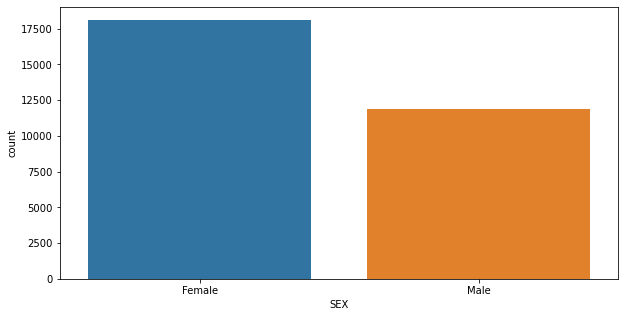

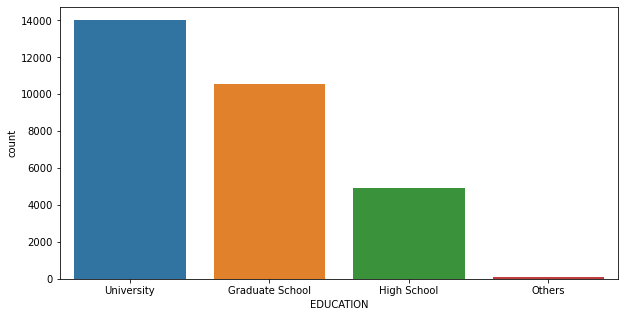

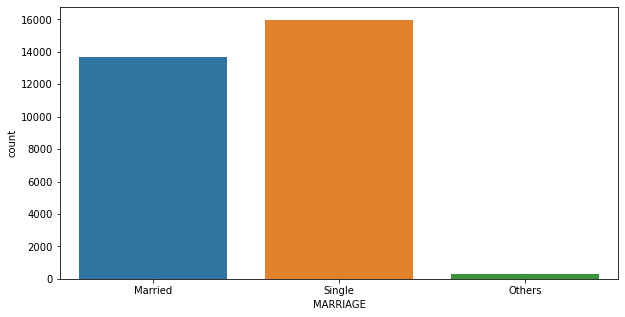

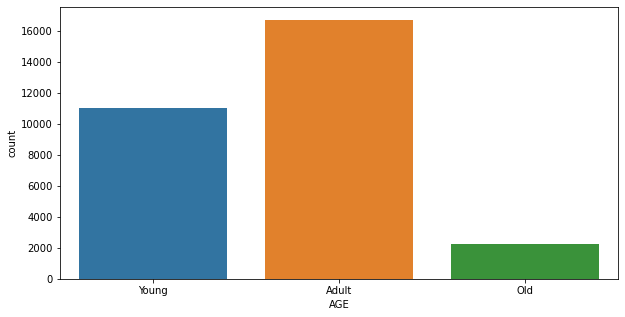

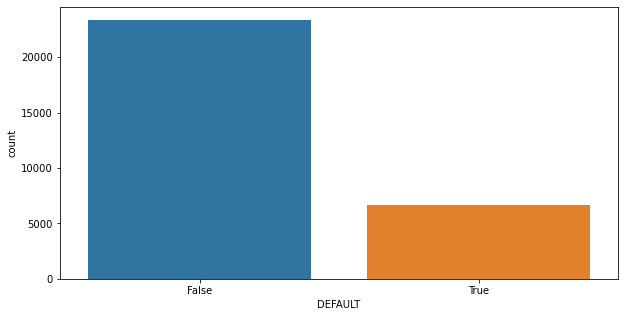

In [10]:
#Now we can start the exploratory analysis of the date, in orde to understand the behavior of the data.

# Distribution by sex
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(df2["SEX"])

# Distribution by Education
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(df2["EDUCATION"])

# Distribution by Marriage
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(df2["MARRIAGE"])

# Distribution by Age
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(df2["AGE"])

# Distribution by Default
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(df2["DEFAULT"])

plt.show()

In [11]:
#Checking for null values
df2.isnull().values.any()

True

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  object  
 1   LIMIT_BAL  30000 non-null  int64   
 2   SEX        30000 non-null  object  
 3   EDUCATION  29655 non-null  object  
 4   MARRIAGE   29946 non-null  object  
 5   AGE        30000 non-null  category
 6   PAY_0      30000 non-null  int64   
 7   PAY_2      30000 non-null  int64   
 8   PAY_3      30000 non-null  int64   
 9   PAY_4      30000 non-null  int64   
 10  PAY_5      30000 non-null  int64   
 11  PAY_6      30000 non-null  int64   
 12  BILL_AMT1  30000 non-null  int64   
 13  BILL_AMT2  30000 non-null  int64   
 14  BILL_AMT3  30000 non-null  int64   
 15  BILL_AMT4  30000 non-null  int64   
 16  BILL_AMT5  30000 non-null  int64   
 17  BILL_AMT6  30000 non-null  int64   
 18  PAY_AMT1   30000 non-null  int64   
 19  PAY_AMT2   30000 non-null

In [13]:
df2.dropna(inplace = True)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29601 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         29601 non-null  object  
 1   LIMIT_BAL  29601 non-null  int64   
 2   SEX        29601 non-null  object  
 3   EDUCATION  29601 non-null  object  
 4   MARRIAGE   29601 non-null  object  
 5   AGE        29601 non-null  category
 6   PAY_0      29601 non-null  int64   
 7   PAY_2      29601 non-null  int64   
 8   PAY_3      29601 non-null  int64   
 9   PAY_4      29601 non-null  int64   
 10  PAY_5      29601 non-null  int64   
 11  PAY_6      29601 non-null  int64   
 12  BILL_AMT1  29601 non-null  int64   
 13  BILL_AMT2  29601 non-null  int64   
 14  BILL_AMT3  29601 non-null  int64   
 15  BILL_AMT4  29601 non-null  int64   
 16  BILL_AMT5  29601 non-null  int64   
 17  BILL_AMT6  29601 non-null  int64   
 18  PAY_AMT1   29601 non-null  int64   
 19  PAY_AMT2   29601 non-null

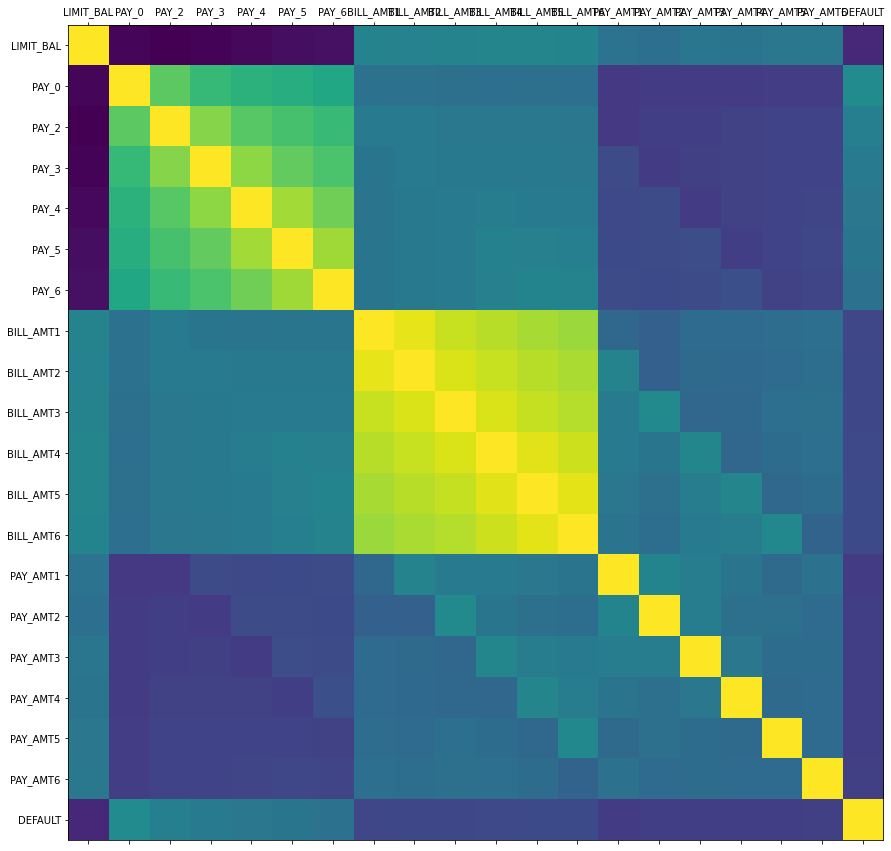

In [15]:
# Lets identify the correlation between variables
# Correlation does not imply causality

def plot_corr(df2, size=15):
    corr = df2.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)
    
# Creating the chart
plot_corr(df2)

In [16]:
df2.corr()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
LIMIT_BAL,1.000000,-0.272342,-0.297232,-0.287093,-0.268346,-0.250293,-0.236602,0.283695,0.276673,0.281738,0.293442,0.295316,0.289701,0.195666,0.177669,0.210523,0.203263,0.217251,0.219676,-0.154357
PAY_0,-0.272342,1.000000,0.671467,0.574096,0.538769,0.509642,0.474946,0.186889,0.189529,0.179442,0.178471,0.180078,0.176779,-0.080139,-0.070470,-0.070906,-0.064646,-0.059781,-0.059943,0.326343
PAY_2,-0.297232,0.671467,1.000000,0.766401,0.661683,0.622160,0.575186,0.235059,0.235378,0.224080,0.221834,0.220865,0.218719,-0.081117,-0.058920,-0.056205,-0.047609,-0.038284,-0.037216,0.264082
PAY_3,-0.287093,0.574096,0.766401,1.000000,0.777055,0.686441,0.632900,0.208543,0.237518,0.227529,0.227117,0.225016,0.222008,0.001454,-0.066883,-0.053357,-0.046522,-0.037099,-0.036647,0.235320
PAY_4,-0.268346,0.538769,0.661683,0.777055,1.000000,0.820086,0.716923,0.202717,0.225780,0.244948,0.245610,0.242532,0.238723,-0.009532,-0.002385,-0.069831,-0.044147,-0.034687,-0.027427,0.216446
PAY_5,-0.250293,0.509642,0.622160,0.686441,0.820086,1.000000,0.817037,0.206988,0.227130,0.243338,0.271428,0.269305,0.261904,-0.006167,-0.003237,0.008493,-0.059033,-0.034696,-0.023447,0.204642
PAY_6,-0.236602,0.474946,0.575186,0.632900,0.716923,0.817037,1.000000,0.207842,0.227363,0.241433,0.265869,0.290047,0.284121,-0.000799,-0.005094,0.005249,0.018306,-0.047846,-0.025939,0.187207
BILL_AMT1,0.283695,0.186889,0.235059,0.208543,0.202717,0.206988,0.207842,1.000000,0.951255,0.891886,0.861238,0.831406,0.804834,0.140489,0.098947,0.156813,0.157643,0.165041,0.175798,-0.019303
BILL_AMT2,0.276673,0.189529,0.235378,0.237518,0.225780,0.227130,0.227363,0.951255,1.000000,0.927801,0.893418,0.861465,0.833846,0.280903,0.100613,0.151052,0.146479,0.155457,0.170718,-0.013710
BILL_AMT3,0.281738,0.179442,0.224080,0.227529,0.244948,0.243338,0.241433,0.891886,0.927801,1.000000,0.925094,0.885669,0.855571,0.244564,0.318039,0.131112,0.142468,0.177549,0.179539,-0.013494


## Spliting - Preparation of data for Machine Learnig models

First, we will separat the data in 70% for training data and 30% for test data.

In [17]:
df2.shape

(29601, 25)

In [18]:
print(df2.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


In [19]:
# Feature Selecion
attributes = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Variable to be forecast
atrib_prev = ["DEFAULT"]

In [20]:
# Creating objects
X = df2[attributes].values
Y = df2[atrib_prev].values

In [21]:
X

array([[    2,     2,    -1, ...,     0,     0,     0],
       [   -1,     2,     0, ...,  3272,  3455,  3261],
       [    0,     0,     0, ..., 14331, 14948, 15549],
       ...,
       [    4,     3,     2, ..., 20878, 20582, 19357],
       [    1,    -1,     0, ..., 52774, 11855, 48944],
       [    0,     0,     0, ..., 36535, 32428, 15313]], dtype=int64)

In [22]:
Y

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [23]:
# Setting the split rate
split_test_size = 0.30

In [24]:
# Creating training and test data
X_training, X_test, Y_training, Y_test = train_test_split(X, Y,test_size = split_test_size)

In [25]:
print(X_training.shape, X_test.shape, Y_training.shape, Y_test.shape)

(20720, 12) (8881, 12) (20720, 1) (8881, 1)


In [26]:
# Print the results
print("{0:0.2f}% in the training data".format((len(X_training)/len(df2.index))*100))
print("{0:0.2f}% in the training data".format((len(X_test)/len(df2.index))*100))

70.00% in the training data
30.00% in the training data


## Checking the split
Let's see how data was separate

In [27]:
print("Original True : {0} ({1:0.2f}%)".format(len(df2.loc[df2['DEFAULT'] == 1]), 
                                               (len(df2.loc[df2['DEFAULT'] ==1])/len(df2.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df2.loc[df2['DEFAULT'] == 0]), 
                                               (len(df2.loc[df2['DEFAULT'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_training[Y_training[:] == 1]), 
                                               (len(Y_training[Y_training[:] == 1])/len(Y_training) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_training[Y_training[:] == 0]), 
                                               (len(Y_training[Y_training[:] == 0])/len(Y_training) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), 
                                               (len(Y_test[Y_test[:] == 1])/len(Y_test) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), 
                                               (len(Y_test[Y_test[:] == 0])/len(Y_test) * 100)))

Original True : 6605 (22.31%)
Original False : 22996 (76.65%)

Training True : 4631 (22.35%)
Training False : 16089 (77.65%)

Test True : 1974 (22.23%)
Test False : 6907 (77.77%)


# Hadling Missing Data

Now, we need to understand what kind a machine learning model we will used for this problem.

But first, lets look if we have handling missing data.In this case, the zero (0) values ​​should be considered values ​​not found, because, in the documentation, we have 3 paramters: Pay in day, where, -1 is a payment in day and payment daley for n months, in other words, zero is not a option. In the paramters Bill_AMT and PAY_AMT its very dificult that the amount bill and amount payed is equal zero. So for those case, we will replance the values for the mean.



In [28]:
# Checking for null values
df2.isnull().values.any()

False

In [29]:
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,Female,University,Married,Young,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,True
1,2,120000,Female,University,Single,Young,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,True
2,3,90000,Female,University,Single,Adult,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,False
3,4,50000,Female,University,Married,Adult,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,False
4,5,50000,Male,University,Married,Old,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,False


In [62]:
# How many zeros we have in database?

print("# Dataframe rows {0}".format(len(df2)))
print("# Missing lines PAY_0: {0}".format(len(df2.loc[df['PAY_0'] == 0])))
print("# Missing lines PAY_2: {0}".format(len(df2.loc[df['PAY_2'] == 0])))
print("# Missing lines PAY_3: {0}".format(len(df2.loc[df['PAY_3'] == 0])))
print("# Missing lines PAY_4: {0}".format(len(df2.loc[df['PAY_4'] == 0])))
print("# Missing lines PAY_5: {0}".format(len(df2.loc[df['PAY_5'] == 0])))
print("# Missing lines PAY_6: {0}".format(len(df2.loc[df['PAY_6'] == 0])))



# Dataframe rows 29601
# Missing lines PAY_0: 14499
# Missing lines PAY_2: 15476
# Missing lines PAY_3: 15518
# Missing lines PAY_4: 16204
# Missing lines PAY_5: 16684
# Missing lines PAY_6: 16053


In [31]:
# Replacing the values ​​equal to zero by the average of the data
from sklearn.impute import SimpleImputer

# Create Object
fill_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Replacing the values equals zero for mean of the data
X_training = fill_0.fit_transform(X_training)
X_test = fill_0.fit_transform(X_test)

In [33]:
print( X_training.shape, X_test.shape, Y_training.shape, Y_test.shape)

(20720, 12) (8881, 12) (20720, 1) (8881, 1)


### Naive Bayes Classifier
A Naive Bayes classifier is a simple probabilistic classifier based on applying Bayes' theorem (from Bayesian statistics) with strong (naive) independence assumptions. A more descriptive term for the underlying probability model would be "independent feature model"



In [43]:
# Using a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

In [44]:
# Creating the predictive model
model_v1 = GaussianNB()

In [45]:
#Training the model
model_v1.fit(X_training, Y_training.ravel())

GaussianNB()

In [46]:
# Checking model accuracy in training data

from sklearn import metrics

In [47]:
nb_predict_train = model_v1.predict(X_training)

In [48]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_training, nb_predict_train)))
print()

Accuracy: 0.7808



In [49]:
# Checking model accuracy in test data
nb_predict_test = model_v1.predict(X_test)

In [50]:
print( "Accuracy Naive Bayes: {0:.4f}".format(metrics.accuracy_score(Y_test, nb_predict_test)))
print()

Accuracy Naive Bayes: 0.7790



In [51]:
print("Confusuion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_test, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_test, nb_predict_test, labels = [1, 0]))


Confusuion Matrix
[[ 139 1835]
 [ 128 6779]]

Classification Report
              precision    recall  f1-score   support

           1       0.52      0.07      0.12      1974
           0       0.79      0.98      0.87      6907

    accuracy                           0.78      8881
   macro avg       0.65      0.53      0.50      8881
weighted avg       0.73      0.78      0.71      8881



### Random Forest Classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.



In [52]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
# Model Training
model_v2 = RandomForestClassifier()
model_v2.fit(X_training, Y_training.ravel())

RandomForestClassifier()

In [64]:
# Checking the test Data
rf_predict_test = model_v2.predict(X_test)
print("Accurary Random Forest:{0:.4f} ".format(metrics.accuracy_score(Y_test, rf_predict_test)))

Accurary Random Forest:0.8121 


In [65]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_test, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_test, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 701 1273]
 [ 396 6511]]

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.36      0.46      1974
           0       0.84      0.94      0.89      6907

    accuracy                           0.81      8881
   macro avg       0.74      0.65      0.67      8881
weighted avg       0.79      0.81      0.79      8881



### Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

In [66]:
from sklearn.linear_model import LogisticRegression

In [68]:
# Third version of the model using Logistic Regression
model_v3 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
model_v3.fit(X_training, Y_training.ravel())
lr_predict_test = model_v3.predict (X_test)

In [71]:
print("Accuracy Logistc Regression: {0:.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_test, lr_predict_test,labels = [1, 0]))

Accuracy Logistc Regression: 0.7713

Classification Report
              precision    recall  f1-score   support

           1       0.23      0.01      0.02      1974
           0       0.78      0.99      0.87      6907

    accuracy                           0.77      8881
   macro avg       0.51      0.50      0.45      8881
weighted avg       0.66      0.77      0.68      8881



In [72]:
# Accuracy in test data
print( "Accuracy Naive Bayes: {0:.4f}".format(metrics.accuracy_score(Y_test, nb_predict_test)))
print("Accurary Random Forest:{0:.4f} ".format(metrics.accuracy_score(Y_test, rf_predict_test)))
print("Accuracy Logistc Regression: {0:.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test)))

Accuracy Naive Bayes: 0.7790
Accurary Random Forest:0.8121 
Accuracy Logistc Regression: 0.7713
